## Importar las librerías necesarias

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

## Preprocesado de datos

Incrementamos el vocabulario con que permitirá que el modelo tenga acceso a un vocabulario más amplio.

In [2]:
number_of_words = 1500  # coge las palabras más frecuentes
max_len = 200  # longitud máxima en palabras de cada review

# Carga el dataset de IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)

# Cortar secuencias de texto a la misma longitud
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Determina el tamaño del conjunto de validación
validation_size = int(len(X_test) * 0.5) 
X_val = X_test[:validation_size]
y_val = y_test[:validation_size]

# Actualiza el test
X_test = X_test[validation_size:]
y_test = y_test[validation_size:]


## Construcción de la RNN

In [3]:
# Configurar parámetros de la capa de Embedding
embed_size = 128
vocab_size = number_of_words

# Paso 3: Construir la RNR
model = Sequential()

# Añadir la capa de embedding (representa las palabras como vectores densos)
model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=max_len))

# Añadir capas de LSTM con Dropout para reducir el sobreajuste
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(units=128))
model.add(Dropout(0.25))

# Añadir la capa totalmente conectada de salida con regularización L2
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compilar el modelo con el optimizador Adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ver la estructura del modelo
model.summary()

c:\Users\soyun\anaconda3\envs\aprendizaje\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento y evaluación del modelo

In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 212ms/step - accuracy: 0.6684 - loss: 0.5906 - val_accuracy: 0.8457 - val_loss: 0.3606
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 214ms/step - accuracy: 0.8334 - loss: 0.3905 - val_accuracy: 0.8429 - val_loss: 0.4126
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.8496 - loss: 0.3788 - val_accuracy: 0.8591 - val_loss: 0.3295
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 153s 613ms/step - accuracy: 0.8805 - loss: 0.2989 - val_accuracy: 0.8600 - val_loss: 0.3552
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 70s 279ms/step - accuracy: 0.8932 - loss: 0.2708 - val_accuracy: 0.8461 - val_loss: 0.3889
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.8763 - loss: 0.2994 - val_accuracy: 0.8517 - val_loss: 0.3579
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.8833 - loss: 0.2927 - val_accuracy: 0.8683 - val_loss: 0.3124
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.8990 - loss: 

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8687 - loss: 0.3268
Test Accuracy: 87.42%


Comparamos las distintas metricas de accuracy:

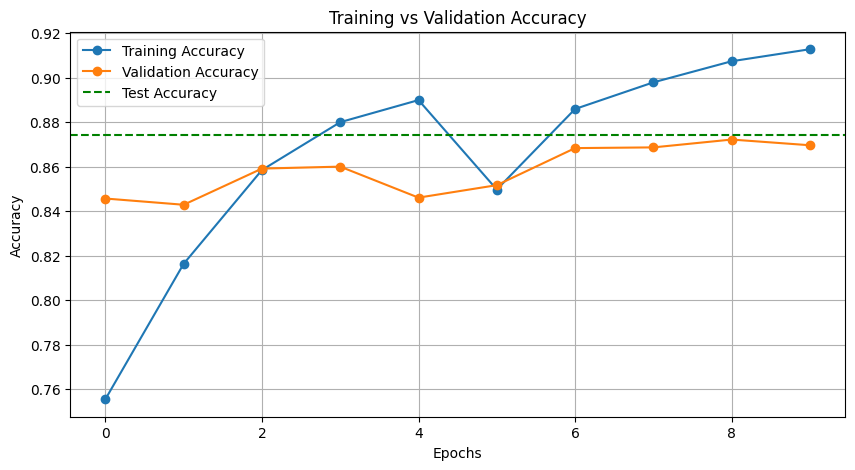

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='green', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Vemos como el val se acerca al test, lo cual es normal. En este caso tras hacer varias pruebas con los parámetros, hemos llegado a la conclusion de que un entrenamiento corto era el más adecuado.